# 02 Model creation
This notebook shows topic model parameters and explores the output (lists of most probable words & topic distributions on the timeline)

In [2]:
library(tidyverse)
library(tidytext)
library(topicmodels)

theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Model creation

In [2]:
# load prepared data as dtm

load("../data/dtm_iamb4_experiment.Rda")

In [3]:
# build the model

iamb4_model <- LDA(dtm_iamb4_experiment,
                    k = 75,
                    method = "Gibbs",
                    control = list(seed = 2105, 
                        alpha = 0.5, delta = 0.1))

In [4]:
# retrieve and save beta & gamma probs
beta <- iamb4_model %>% tidy(matrix = "beta")

gamma <- iamb4_model %>% tidy(matrix = "gamma") %>% 
    # separate document id into meaningful columns
    separate(document, into = c("index", "year", "first_line", "formula"), sep = "__") %>% 
    separate(index, into = c("corpus", "id"), sep = "_")

# save(beta, gamma, file = "../data/lda75_output.Rda")

## Model exploration

In [1]:
load("../data/lda75_output.Rda")

In [5]:
# check
glimpse(beta)

Rows: 375,000
Columns: 3
$ topic <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…
$ term  <chr> "бездна", "бездна", "бездна", "бездна", "бездна", "бездна", "без…
$ beta  <dbl> 1.300559e-05, 1.401345e-05, 1.389854e-05, 1.287001e-05, 1.469802…


In [6]:
glimpse(gamma)

Rows: 1,076,700
Columns: 7
$ corpus     <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N",…
$ id         <chr> "1-1", "1-2", "1-3", "10-1", "10-2", "100-1", "100-2", "100…
$ year       <chr> "1785", "1785", "1785", "1803", "1803", "1810", "1810", "18…
$ first_line <chr> "ССБобров", "ССБобров", "ССБобров", "ССБобров", "ССБобров",…
$ formula    <chr> "iamb_4", "iamb_4", "iamb_4", "iamb_4", "iamb_4", "iamb_6",…
$ topic      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ gamma      <dbl> 0.019108280, 0.006211180, 0.006451613, 0.006211180, 0.00763…


In [ ]:
# quick beta viz
beta  %>% 
  mutate(topic = as.factor(topic))  %>% 
  group_by(topic) %>%
  top_n(15, beta) %>%
  ungroup() %>%
  ggplot(aes(x = reorder_within(term, beta, topic), 
    y = beta, fill = topic)) +
  scale_x_reordered() + 
  geom_col() +
  coord_flip() +
  facet_wrap(~topic, scales = "free") +
  guides(fill="none") +
  theme(axis.text = element_text(size = 8))

ggsave(filename = "../plots/02_beta_topics.png", plot = last_plot(), 
      width = 16, height = 14, dpi = 300, bg = "white")

[1] "Most probable topics (avg)"


topic,avg_gamma
<int>,<dbl>
26,0.01531111
24,0.01494394
13,0.01481866
8,0.01439286
41,0.01412374
66,0.01409489
31,0.01405466
6,0.01403432
59,0.01401595


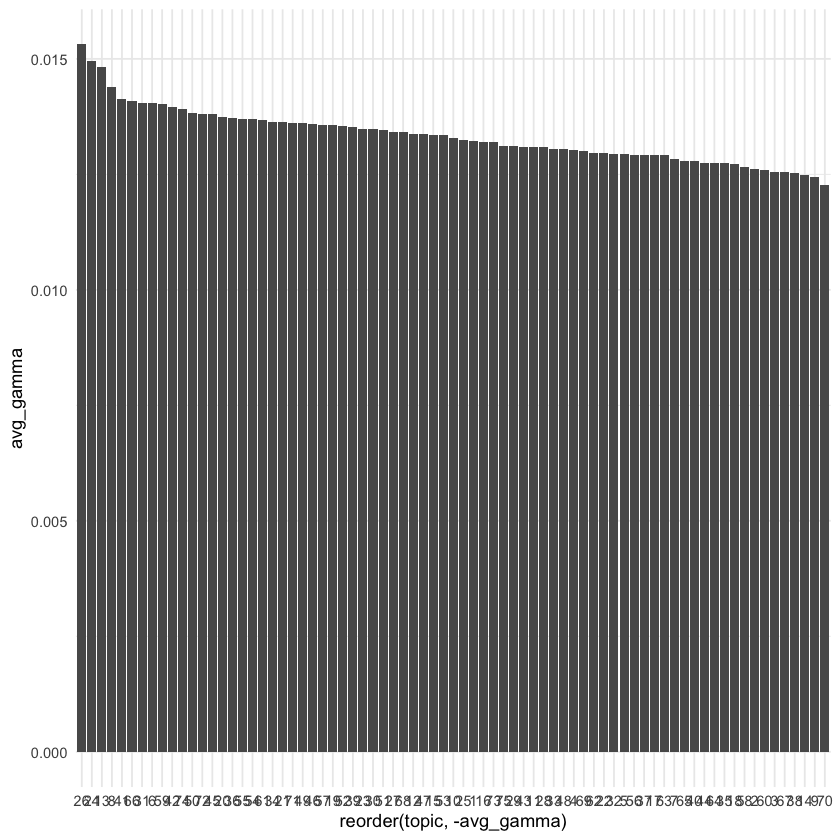

In [5]:
# distribution of topic probabilities 
topic_probs <- gamma %>%
  group_by(topic) %>%
  summarise(avg_gamma = mean(gamma)) %>% 
  ungroup() %>% 
  arrange(desc(avg_gamma))

print("Most probable topics (avg)")
head(topic_probs, 10)

topic_probs %>% 
  ggplot(aes(reorder(topic,-avg_gamma), avg_gamma)) + geom_col()

Example: topic distribution in one text:

In [6]:
gamma %>% 
    filter(corpus == "N" & id == "1-1") %>% 
    arrange(desc(gamma)) %>% head(10)

gamma %>% 
    filter(corpus == "N" & id == "3-1") %>% 
    arrange(desc(gamma)) %>% head(10)

corpus,id,year,first_line,formula,topic,gamma
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
N,1-1,1785,ССБобров,iamb_4,71,0.13375796
N,1-1,1785,ССБобров,iamb_4,6,0.05732484
N,1-1,1785,ССБобров,iamb_4,69,0.05732484
N,1-1,1785,ССБобров,iamb_4,37,0.04458599
N,1-1,1785,ССБобров,iamb_4,61,0.04458599
N,1-1,1785,ССБобров,iamb_4,7,0.03184713
N,1-1,1785,ССБобров,iamb_4,13,0.03184713
N,1-1,1785,ССБобров,iamb_4,30,0.03184713
N,1-1,1785,ССБобров,iamb_4,49,0.03184713


corpus,id,year,first_line,formula,topic,gamma
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
N,3-1,1787,ССБобров,iamb_4,24,0.16083916
N,3-1,1787,ССБобров,iamb_4,73,0.04895105
N,3-1,1787,ССБобров,iamb_4,6,0.03496503
N,3-1,1787,ССБобров,iamb_4,19,0.03496503
N,3-1,1787,ССБобров,iamb_4,37,0.03496503
N,3-1,1787,ССБобров,iamb_4,3,0.02097902
N,3-1,1787,ССБобров,iamb_4,29,0.02097902
N,3-1,1787,ССБобров,iamb_4,33,0.02097902
N,3-1,1787,ССБобров,iamb_4,44,0.02097902


In [11]:
# top metrical forms
gamma %>% 
  group_by(formula) %>% 
  count(sort = T) %>% 
  head(20)

formula,n
<chr>,<int>
iamb_4,318000
iamb_free,184800
trochee_4,124350
iamb_6,117825
iamb_5,63150
other_6,27225
iamb_3,25725
other_free,16725
amphibrach_4,15300


`summarise()` has grouped output by 'year_span'. You can override using the
`.groups` argument.
Selecting by gamma_avg


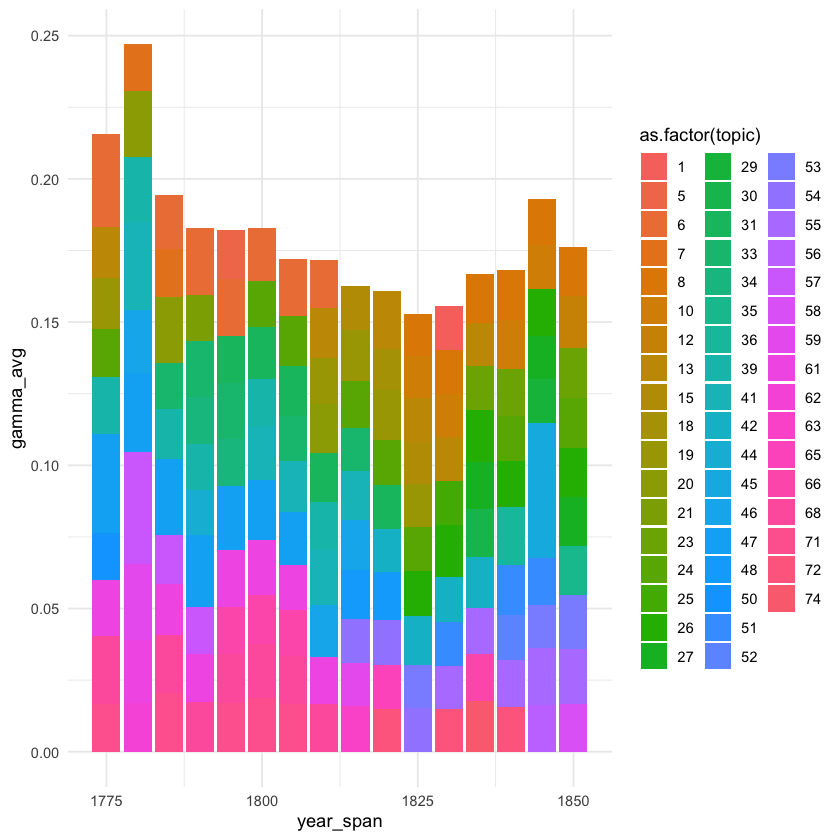

In [36]:
# quick gamma test : top 10 topics 
gamma %>% 
  mutate(year_span = floor(as.numeric(year)/5)*5) %>% 
  group_by(year_span, topic) %>% 
  summarise(gamma_avg = mean(gamma)) %>% 
  top_n(10) %>% 
  ggplot(aes(x = year_span, y = gamma_avg, fill = as.factor(topic))) + geom_col()